In [3]:
import serial 
import pandas as pd
import json
import time
from datetime import datetime

ar_port = '/dev/ttyUSB0'
baud = 9600
ser = serial.Serial(ar_port, baud)

start = time.time()
time_pass = 0

records ={'time':[], 'value':[]}
while time_pass < 45:
    time_pass = int(time.time() - start)
    if ser.in_waiting > 0:
        t = datetime.now().strftime('%H:%m:%S')
        val = ser.readline().decode().rstrip()
        records['time'].append(t)
        records['value'].append(val)
        
    # if time_pass == 5:
    #     print('start')    
    
    # if time_pass % 10 == 0:
    #     print('next step')
        
        
filename = f'measures_{int(start)}'
with open(f'/home/hakbro/Documents/10_Scraping/{filename}.json', 'w') as j:
    json.dump(records, j)
    
df = pd.DataFrame(records)

In [48]:
p1 = '/home/hakbro/Documents/10_Scraping/measures_1685820190.json'
p2 = '/home/hakbro/Documents/10_Scraping/measures_1685820268.json'

with open(p1, 'r') as j1:
    d1 = json.load(j1)
with open(p2, 'r') as j2:
    d2 = json.load(j2)
    
df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)

df1.reset_index(inplace=True)
df2.reset_index(inplace=True)

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

def plot_chart(df):
    df['value'] = df['value'].astype(int)

    df.plot( y='value')
    plt.show()




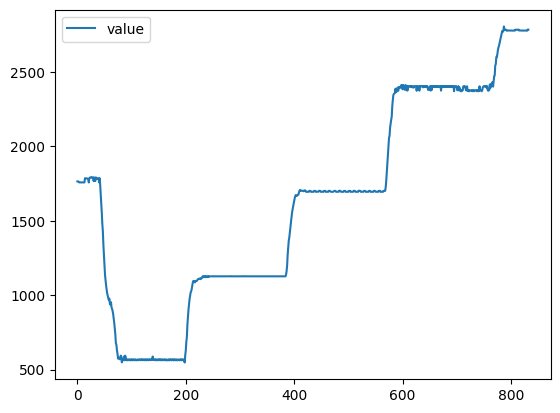

In [50]:
df1['value'] = df1['value'].astype(int)

df1.plot(y='value')
plt.show()

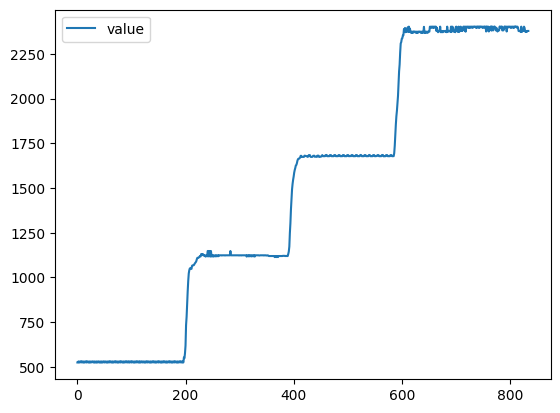

In [51]:
df2['value'] = df2['value'].astype(int)

df2.plot(y='value')
plt.show()

In [69]:
import numpy as np

# df3 = df2.loc[(df2['index'] > 450) & (df2['index'] < 550)].copy()
df3 = df2.copy()
df3['distance'] = np.select([(df3['index'] >= 50) & (df3['index'] <= 180),
                             (df3['index'] >= 250) & (df3['index'] <= 380),
                             (df3['index'] >= 450) & (df3['index'] <= 580),
                             (df3['index'] >= 650) & (df3['index'] <= 780)],
                            [10, 20, 30, 40],
                            default=False)
df33 = df3.loc[df3['distance'].isin([10, 20, 30, 40])]



In [78]:
df33

,index,time,value,distance
50,50,15:06:31,525,10
51,51,15:06:31,529,10
52,52,15:06:31,531,10
53,53,15:06:31,525,10
54,54,15:06:31,525,10
...,...,...,...,...
776,776,15:06:10,2381,40
777,777,15:06:10,2375,40
778,778,15:06:10,2381,40
779,779,15:06:10,2381,40


/tmp/ipykernel_5069/2090579644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df33['value'] = df33['value'].astype(int)


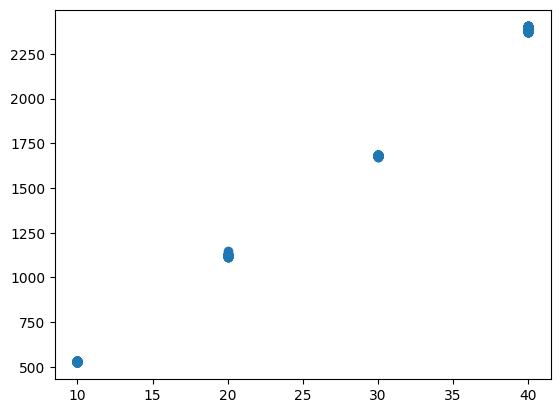

In [72]:
df33['value'] = df33['value'].astype(int)

plt.scatter(x=df33['distance'],y=df33['value'])
plt.show()

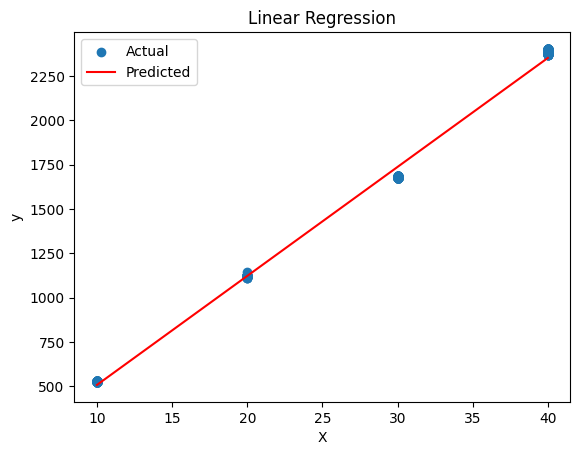

In [74]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = df33[['distance']]
y = df33['value']  

model = LinearRegression()
model.fit(X, y)

# Predict using the fitted model
y_pred = model.predict(X)

# Print the predicted values
plt.scatter(X, y, label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [81]:
panta = 1 / model.coef_[0]
print(model.coef_[0])
print(panta)

61.45755725190833
0.016271391912000357
